Final Project 2 ~ Dimas Rifai Lombu

PYTN-KS01-001

Dataset yang digunakan pada final project 2 yaitu dataset [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/version/2) yang terdiri dari 23 kolom dan 145460 data

**Objektif yang ingin dicapai dari final project 2 ini yaitu mengevaluasi konsep logistic Regression dan SVM sebagai berikut :**

1. Mampu memahami konsep Classification dengan Logistic Regression dan SVM
2. Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
3. Mampu mengimplementasikan Logistic Regression untuk membuat prediksi

## Import Library & Load data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
%matplotlib inline

In [3]:
df = pd.read_csv('../weatherAUS.csv')
pd.set_option("display.max_columns", None)

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df["Date"] = pd.to_datetime(df["Date"])

df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

df.drop("Date", axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [7]:
df.nunique()

Location          49
MinTemp          389
MaxTemp          505
Rainfall         681
Evaporation      358
Sunshine         145
WindGustDir       16
WindGustSpeed     67
WindDir9am        16
WindDir3pm        16
WindSpeed9am      43
WindSpeed3pm      44
Humidity9am      101
Humidity3pm      101
Pressure9am      546
Pressure3pm      549
Cloud9am          10
Cloud3pm          10
Temp9am          441
Temp3pm          502
RainToday          2
RainTomorrow       2
year              11
month             12
day               31
dtype: int64

## Data Cleaning

In [8]:
miss_val = pd.DataFrame(df.isnull().sum(),columns = ['missing values'])

miss_val['% missing_values']= (miss_val/len(df)).round(3)*100
miss_val

,missing values,% missing_values
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,0.9
Rainfall,3261,2.2
Evaporation,62790,43.2
Sunshine,69835,48.0
WindGustDir,10326,7.1
WindGustSpeed,10263,7.1
WindDir9am,10566,7.3
WindDir3pm,4228,2.9


In [9]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 
 numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


In [10]:
df = df.drop(['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine'], axis=1)

In [11]:
categorical = [i for i in df.columns if df[i].dtypes == 'O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [12]:
for cat_col in categorical:
    df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)

In [13]:
numerical = [i for i in df.columns if i not in categorical] 
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'month',
 'day']

In [14]:
for num_col in numerical:
    df[num_col].fillna(df[num_col].median(),inplace=True)

In [15]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

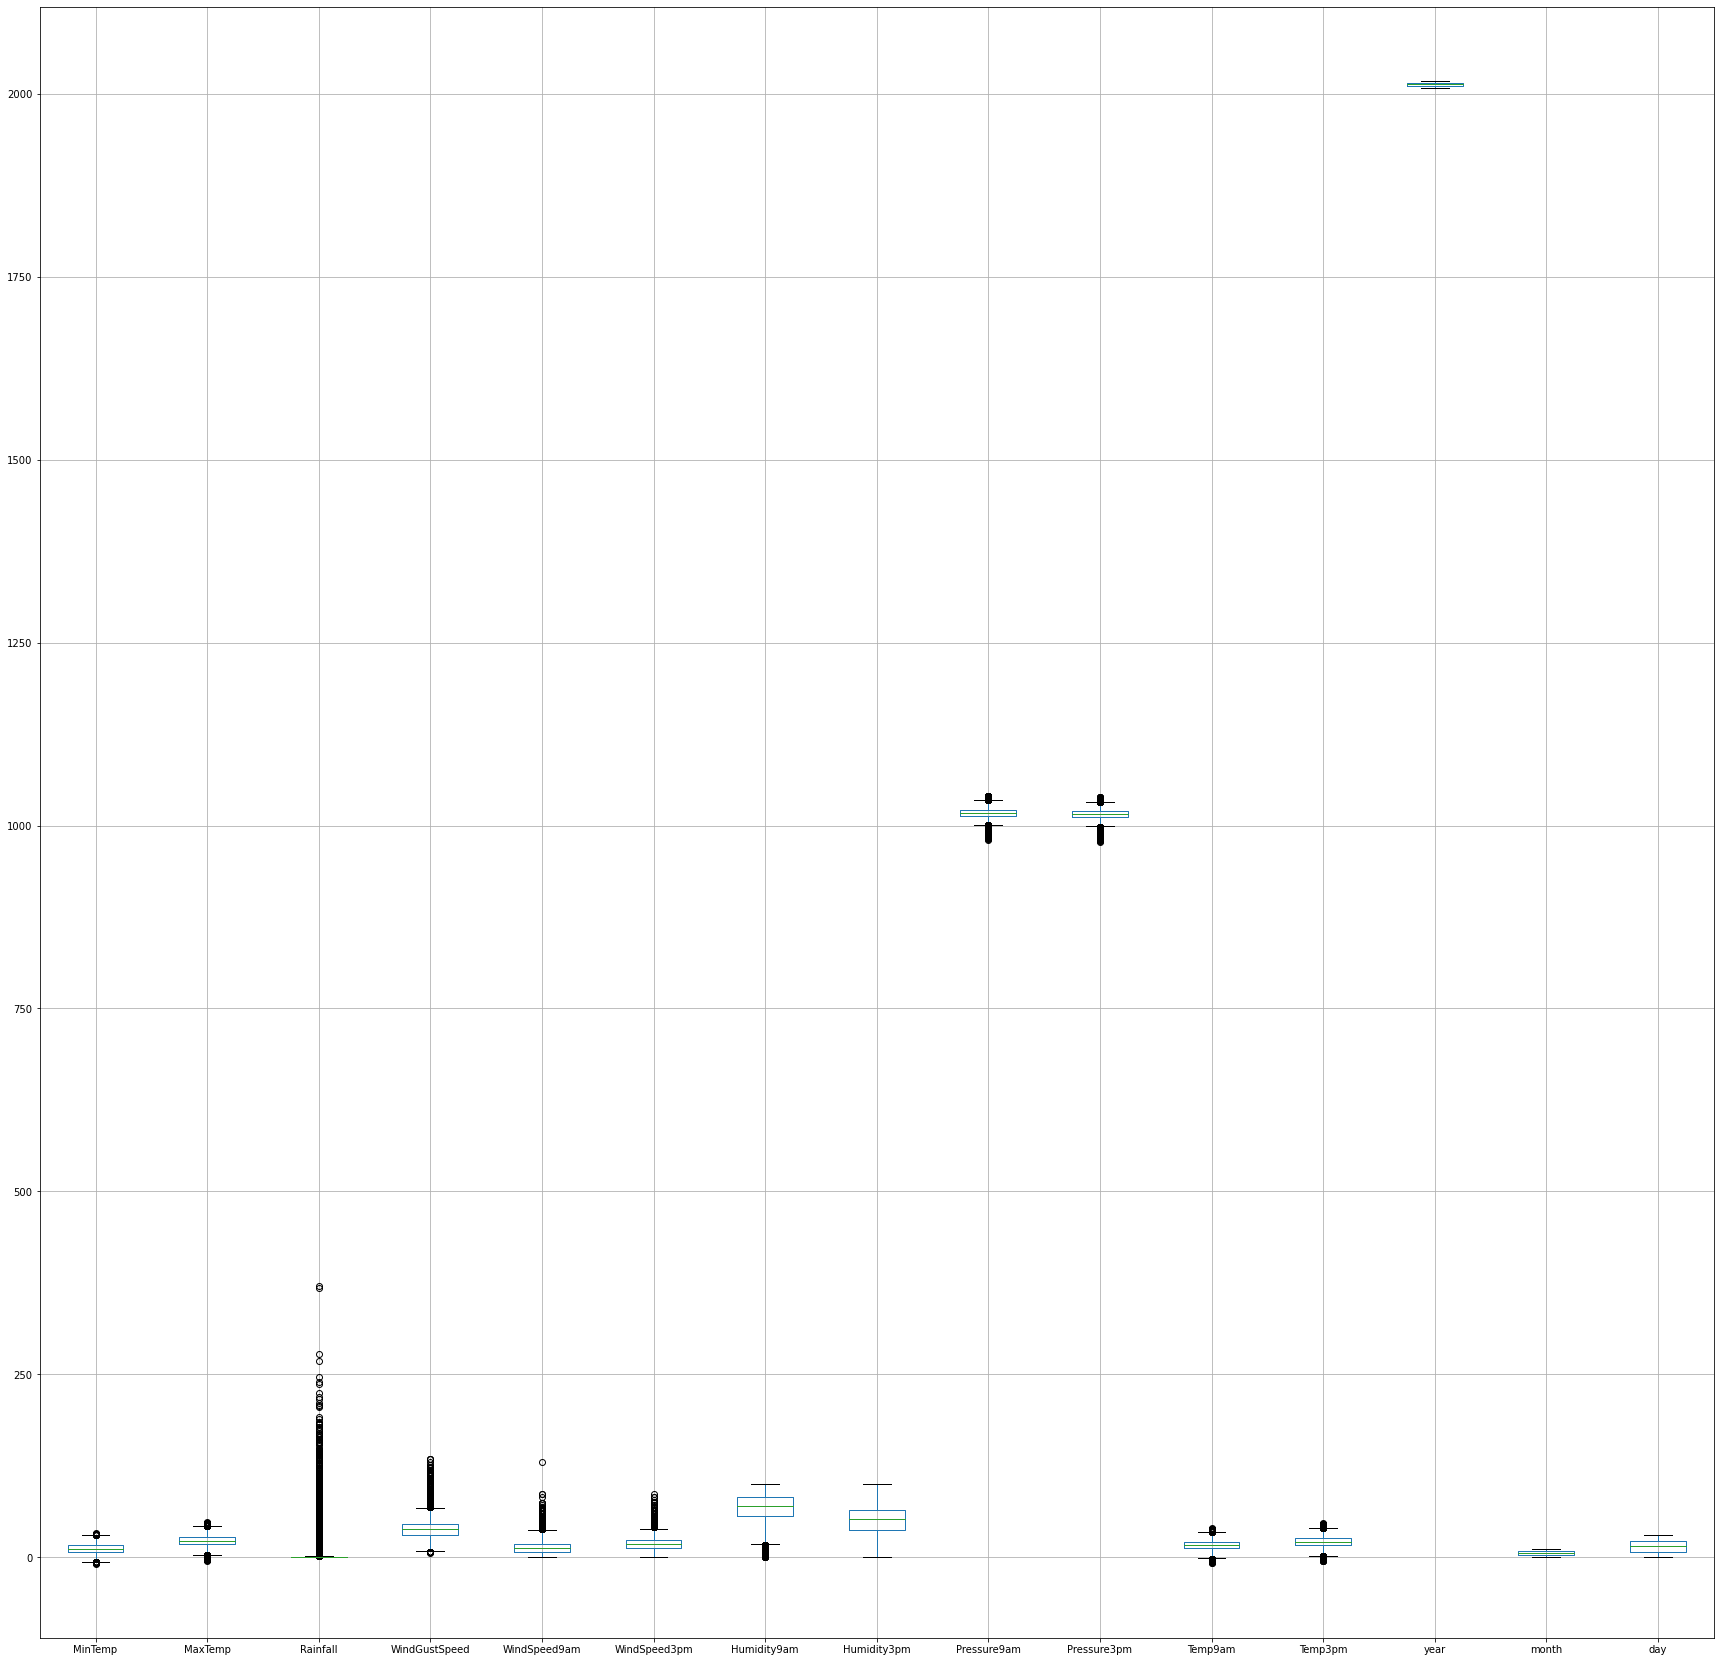

In [16]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

In [17]:
outlier = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']
print('outlier :',outlier)

outlier : ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [18]:
for feature in outlier:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

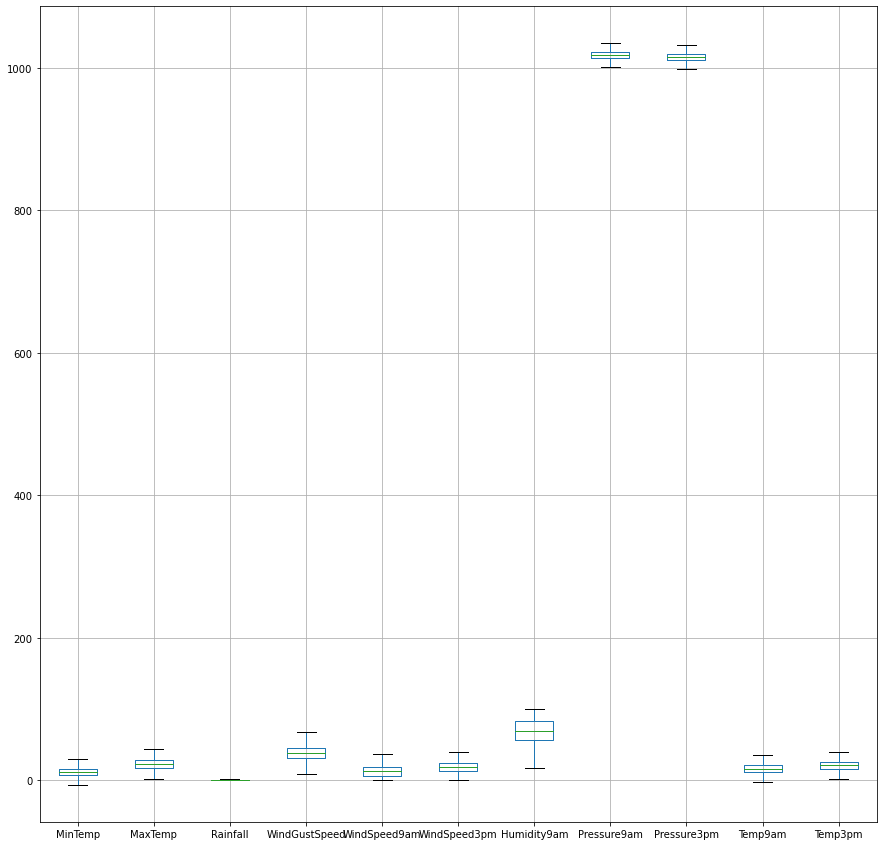

In [19]:
df[outlier].boxplot(figsize = (15,15))
plt.show()

- Hampir sebagian besar variabel dari data memiliki missing value dan nilai outlier
- Missing value pada atribut bertipe numeric ditangani dengan imputasi median
- Missing value pada atribut bertipe object/categorical ditangani dengan imputasi modus
- Nilai outlier diatasi dengan IQR

## EDA

In [20]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,year,month,day
count,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192336,23.219758,0.381674,39.64328,13.939757,18.583126,68.953025,51.553396,1017.671706,1015.268537,16.988207,21.671194,2012.769751,6.399615,15.712258
std,6.364499,7.067804,0.608638,12.17591,8.555976,8.442404,18.704151,20.471345,6.568469,6.528909,6.440883,6.813343,2.537684,3.427262,8.794789
min,-5.950000,2.700000,0.000000,8.50000,0.000000,0.000000,18.000000,0.000000,1001.050000,998.650000,-1.500000,2.450000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,31.00000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,39.00000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,46.00000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,30.450000,43.500000,1.500000,68.50000,37.000000,40.500000,100.000000,100.000000,1034.250000,1031.850000,35.300000,40.450000,2017.000000,12.000000,31.000000


In [21]:
df.describe(include = 'O')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,145460,145460,145460,145460
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,20241,22324,15066,113580,113583


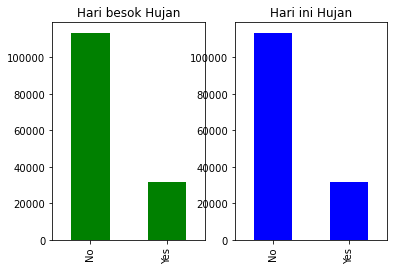

In [22]:
plt.subplot(1,2,1)
df['RainTomorrow'].value_counts().plot.bar(color='g')
plt.title('Hari besok Hujan')

plt.subplot(1,2,2)
df['RainToday'].value_counts().plot.bar(color='b')
plt.title('Hari ini Hujan')
plt.show()

In [23]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.733335,0.045802,0.184574,0.177643,0.177179,-0.231038,0.006174,-0.432271,-0.440256,0.897917,0.698505,0.042951,-0.202698,0.002355
MaxTemp,0.733335,1.000000,-0.262982,0.078237,0.017255,0.052880,-0.497532,-0.498474,-0.318759,-0.405978,0.879546,0.968508,0.061500,-0.163080,0.000697
Rainfall,0.045802,-0.262982,1.000000,0.143865,0.097256,0.077540,0.391159,0.408150,-0.171567,-0.086562,-0.120977,-0.267579,-0.017269,0.013958,0.003025
WindGustSpeed,0.184574,0.078237,0.143865,1.000000,0.580955,0.661913,-0.218508,-0.032141,-0.421874,-0.379297,0.158880,0.044412,-0.028071,0.057369,-0.010007
WindSpeed9am,0.177643,0.017255,0.097256,0.580955,1.000000,0.507652,-0.273328,-0.033233,-0.213168,-0.163798,0.131650,0.007581,-0.017335,0.051488,-0.008829
WindSpeed3pm,0.177179,0.052880,0.077540,0.661913,0.507652,1.000000,-0.146452,0.015144,-0.275161,-0.236586,0.165844,0.031225,-0.029318,0.058935,-0.010365
Humidity9am,-0.231038,-0.497532,0.391159,-0.218508,-0.273328,-0.146452,1.000000,0.659063,0.134403,0.178795,-0.468640,-0.490019,0.009821,-0.089185,0.015083
Humidity3pm,0.006174,-0.498474,0.408150,-0.032141,-0.033233,0.015144,0.659063,1.000000,-0.023631,0.051423,-0.216506,-0.555013,-0.009038,-0.018597,0.012798
Pressure9am,-0.432271,-0.318759,-0.171567,-0.421874,-0.213168,-0.275161,0.134403,-0.023631,1.000000,0.959960,-0.407110,-0.275707,0.028061,0.035303,-0.019912
Pressure3pm,-0.440256,-0.405978,-0.086562,-0.379297,-0.163798,-0.236586,0.178795,0.051423,0.959960,1.000000,-0.449970,-0.369819,0.022847,0.025965,-0.020151


In [24]:
df=df.drop(columns=['Temp9am','Temp3pm','Pressure9am'],axis=1)

In [25]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,No,No,2008,12,5


- Diperoleh bahwa rata - rata curah hujan sebesar 0.48
- Diperoleh bahwa rata - rata kecepatan angin berada pada 39.73
- Diperoleh bahwa lokasi paling banyak terletak di Canberra sebanyak 49
- Diperoleh bahwa arah angin yang paling sering yakni W
- Diperoleh bahwa terdapat korelasi yang tinggi diantara atribut Temp9am,Temp3pm,Pressure9am, dan Pressure9am yang berarti atribut tsb merepresentasikan informasi yang sama.

## Data Preprocessing

In [26]:
categorical = [i for i in df.columns if df[i].dtypes == 'O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [27]:
def encoding(feature):
    mapping = {} 
    unique = list(df[feature].unique())
    for index in range(len(unique)): 
        mapping[unique[index]] = index
    return mapping


for category in categorical:
    df[category].replace(encoding(category), inplace = True)
    
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.1,0,0,2008,12,1
1,0,7.4,25.1,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1007.8,0,0,2008,12,2
2,0,12.9,25.7,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1008.7,0,0,2008,12,3
3,0,9.2,28.0,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1012.8,0,0,2008,12,4
4,0,17.5,32.3,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1006.0,0,0,2008,12,5


## Feature Selection

In [28]:
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [29]:
etr_model = ExtraTreesRegressor()
etr_model.fit(x,y)

ExtraTreesRegressor()

In [30]:
feature_imp = pd.Series(etr_model.feature_importances_,index=x.columns)
feature_imp

Location         0.049471
MinTemp          0.047847
MaxTemp          0.049227
Rainfall         0.063969
WindGustDir      0.040350
WindGustSpeed    0.069473
WindDir9am       0.041136
WindDir3pm       0.042606
WindSpeed9am     0.042913
WindSpeed3pm     0.045503
Humidity9am      0.052531
Humidity3pm      0.222638
Pressure3pm      0.071029
RainToday        0.031729
year             0.042257
month            0.042389
day              0.044933
dtype: float64

In [31]:
selector = SelectKBest(f_classif, k = 10)
X_new = selector.fit_transform(x, y)
names = x.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

      Feat_names      F_Scores
7    Humidity3pm  33596.712523
2       Rainfall  16984.689630
9      RainToday  14999.484212
6    Humidity9am   9879.463487
3  WindGustSpeed   7129.963540
8    Pressure3pm   6669.103493
1        MaxTemp   3643.089293
4   WindSpeed9am   1057.260582
0        MinTemp    990.868093
5   WindSpeed3pm    963.194661


In [32]:
x_new = df[['Location','Humidity3pm','Rainfall','RainToday','Humidity9am',
            'WindGustSpeed','Pressure3pm','MaxTemp','WindSpeed9am','MinTemp']]

In [33]:
x_new

,Location,Humidity3pm,Rainfall,RainToday,Humidity9am,WindGustSpeed,Pressure3pm,MaxTemp,WindSpeed9am,MinTemp
0,0,22.0,0.6,0,71.0,44.0,1007.1,22.9,20.0,13.4
1,0,25.0,0.0,0,44.0,44.0,1007.8,25.1,4.0,7.4
2,0,30.0,0.0,0,38.0,46.0,1008.7,25.7,19.0,12.9
3,0,16.0,0.0,0,45.0,24.0,1012.8,28.0,11.0,9.2
4,0,33.0,1.0,0,82.0,41.0,1006.0,32.3,7.0,17.5
...,...,...,...,...,...,...,...,...,...,...
145455,48,24.0,0.0,0,51.0,31.0,1020.3,23.4,13.0,2.8
145456,48,21.0,0.0,0,56.0,22.0,1019.1,25.3,13.0,3.6
145457,48,24.0,0.0,0,53.0,37.0,1016.8,26.9,9.0,5.4
145458,48,24.0,0.0,0,51.0,28.0,1016.5,27.0,13.0,7.8


In [34]:
input_variables = [i for i in x_new.columns if i != 'RainTomorrow']

In [35]:
scaler = StandardScaler()
x_new[input_variables] = scaler.fit_transform(x_new[input_variables])

C:\Users\ACER\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [36]:
x_new

,Location,Humidity3pm,Rainfall,RainToday,Humidity9am,WindGustSpeed,Pressure3pm,MaxTemp,WindSpeed9am,MinTemp
0,-1.689897,-1.443652,0.358714,-0.529795,0.109440,0.357816,-1.251138,-0.045242,0.708308,0.189751
1,-1.689897,-1.297105,-0.627098,-0.529795,-1.334095,0.357816,-1.143922,0.266030,-1.161737,-0.752982
2,-1.689897,-1.052860,-0.627098,-0.529795,-1.654880,0.522075,-1.006073,0.350922,0.591430,0.111190
3,-1.689897,-1.736746,-0.627098,-0.529795,-1.280631,-1.284777,-0.378095,0.676343,-0.343592,-0.470162
4,-1.689897,-0.906314,1.015921,-0.529795,0.697547,0.111427,-1.419620,1.284738,-0.811103,0.833951
...,...,...,...,...,...,...,...,...,...,...
145455,1.752998,-1.345954,-0.627098,-0.529795,-0.959845,-0.709870,0.770646,0.025502,-0.109837,-1.475744
145456,1.752998,-1.492501,-0.627098,-0.529795,-0.692524,-1.449037,0.586848,0.294328,-0.109837,-1.350046
145457,1.752998,-1.345954,-0.627098,-0.529795,-0.852917,-0.217092,0.234567,0.520707,-0.577348,-1.067226
145458,1.752998,-1.345954,-0.627098,-0.529795,-0.959845,-0.956259,0.188618,0.534856,-0.109837,-0.690133


## Pendefinisian Model

### Split Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    x_new, y, test_size=0.20, random_state=325)

### Logistic Regression

In [38]:
logreg_model = LogisticRegression(penalty = 'l2', random_state = 5)

In [39]:
logreg_model = logreg_model.fit(X_train, y_train)

### Support Vector Machine

In [40]:
svm_model = svm.SVC(kernel='linear')

In [41]:
svm_model = svm_model.fit(X_train, y_train)

## Model Evaluation

### Logistic Regression

In [42]:
y_pred_logreg = logreg_model.predict(X_test)
print("Test score:", logreg_model.score(X_test, y_test))
print("Train score:", logreg_model.score(X_train, y_train))

Test score: 0.8413653238003574
Train score: 0.8386755809157157


In [43]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_logreg))
print('Presisi :', precision_score(y_test,y_pred_logreg))
print('Recall :', recall_score(y_test,y_pred_logreg))
print('F1 Score :', f1_score(y_test,y_pred_logreg))

Ringkasan Evaluasi Model
Akurasi : 0.8413653238003574
Presisi : 0.7182529664226206
Recall : 0.4484552332912989
F1 Score : 0.5521591460456089


### Support Vector Machine

In [44]:
y_pred_svm = svm_model.predict(X_test)

print("Test score:", svm_model.score(X_test, y_test))
print("Train score:", svm_model.score(X_train, y_train))

Test score: 0.8412965763783858
Train score: 0.8386841743434621


In [45]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_svm))
print('Presisi :', precision_score(y_test,y_pred_svm))
print('Recall :', recall_score(y_test,y_pred_svm))
print('F1 Score :', f1_score(y_test,y_pred_svm))

Ringkasan Evaluasi Model
Akurasi : 0.8412965763783858
Presisi : 0.7423519506034241
Recall : 0.41692938209331654
F1 Score : 0.5339658827091955


In [46]:
pickle.dump(logreg_model, open('model_fp2.pkl','wb'))

## Conclusions

- Tujuan dari project ini yaitu memprediksi apakah akan terjadi hujan atau tidak di Australia dengan menggunakan variabel target yaitu **RainTomorrow**
- Terdapat 22 atribut yang diasumsikan memengaruhi Hari besok Hujan. Setelah dilakukan analisis, diambil 10 atribut/faktor yang paling berpengaruh dalam model
- Berdasarkan kedua model tersebut diperoleh nilai akurasi untuk masing-masing model adalah ; Logistic Regression nilai akurasinya sebesar 0.8413653238003574 atau sebesar 84,13% sedangkan menggunakan SVM nilai akurasinya sebesar 0.8412965763783858 atau sebesar 84,12%.
- Berdasarkan nilai akurasi yang dihasilkan, maka model yang digunakan yaitu **Logistic Regression**